#Disease Prediction from Symptoms

A data mining application to predict disease using symptom data i.e. Prognosis.here we used the below dataset and  build a model using both Multinomial Naive-Bayes and
 Decision Tree Algorithm to predict the disease given the symptoms observed in a person.


The dataset source(Model Training): http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html


The extraction was performed by copying the data on the website in the .html format and saving it in an Excel file for performing further operations. Basic cleaning, segmentation of columns and string formatting were performed in excel. The excel sheet was then added to this Google Colab Notebook.



##Importing all needed libraries

In [330]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Transforming & Loading the Data

### Loading the Dataset File generated after preprocessing in excel

In [331]:
disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_') # using _ as common splitting delimeter
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group) # refer the data format
        ctr = ctr + 1

    return disease_list

with open("raw_data_2.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)

    for row in reader:

        if row[0]!="\xc2\0xa0" and row[0]!="": # for handling file encoding errors
          # saving disease and frequency
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\0xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s) # adding all symptoms
                dict_wt[d] = weight


### Reformatting the data

In [332]:
# saving cleaned data
with open("dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [333]:
columns = ['Source','Target','Weight'] # source: disease, target: symptom, weight: number of cases

In [334]:
data = pd.read_csv("dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [335]:
data.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Weight']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Weight'}, axis=1)
              .sort_values('Weight', ascending=True))
  xs = counted['Weight']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Weight', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Target')):
  _plot_series(series, series_name, i)
  fig.legend(title='Target', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Weight')
_ = plt.ylabel('count()')

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [336]:
data.to_csv("dataset_clean.csv",index=False)

In [337]:
data = pd.read_csv("dataset_clean.csv", encoding ="ISO-8859-1")

In [338]:
data.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

from matplotlib import pyplot as plt
import seaborn as sns
_df_26.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Weight']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Weight'}, axis=1)
              .sort_values('Weight', ascending=True))
  xs = counted['Weight']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Weight', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Target')):
  _plot_series(series, series_name, i)
  fig.legend(title='Target', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Weight')
_ = plt.ylabel('count()')

In [339]:
len(data['Source'].unique()) # unique diseases

149

In [340]:
len(data['Target'].unique()) # unique symptoms

405

In [341]:
df = pd.DataFrame(data)

In [342]:
df_1 = pd.get_dummies(df.Target) # 1 hot encoding symptoms

In [343]:
df_1.head()

Heberden's node  Murphy's sign  Stahli's line  abdomen acute  \
0                0              0              0              0   
1                0              0              0              0   
2                0              0              0              0   
3                0              0              0              0   
4                0              0              0              0   

   abdominal bloating  abdominal tenderness  abnormal sensation  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   abnormally hard consistency  abortion  abscess bacterial  ...  \
0                            0         0                  0  ...   
1                            0         0                  0  ...   
2                            0         0                  0  ...   
3                            0         0                  0  ...   
4                            0         0                  0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 404 columns]

In [344]:
df.head()

Source               Target  Weight
0  hypertensive disease           pain chest    3363
1  hypertensive disease  shortness of breath    3363
2  hypertensive disease            dizziness    3363
3  hypertensive disease             asthenia    3363
4  hypertensive disease                 fall    3363

<Axes: xlabel='count', ylabel='Target'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


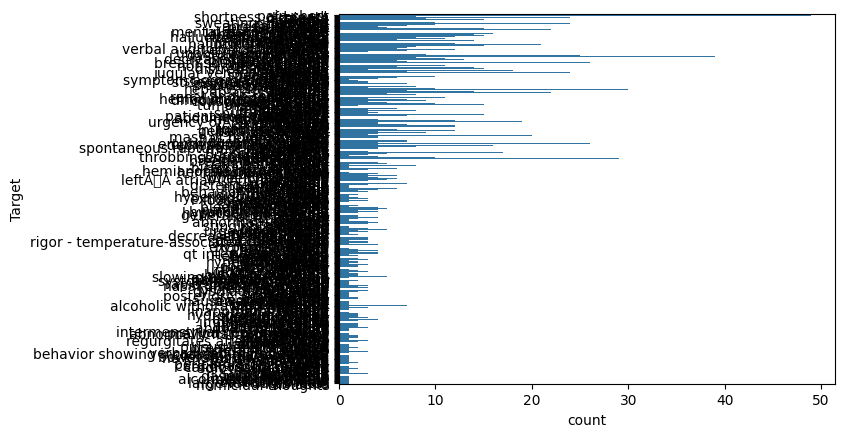

In [345]:
df_s = df['Source']
sns.countplot(df['Target'])


<Axes: xlabel='count', ylabel='Source'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


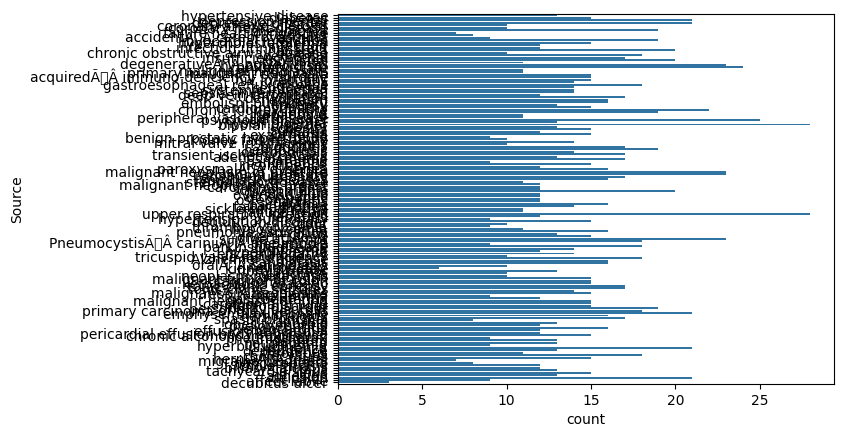

In [346]:
sns.countplot(df_s)

In [347]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [348]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [349]:
df_pivoted[:5]

Source  Heberden's node  Murphy's sign  Stahli's line  \
0  hypertensive disease                0              0              0   
1  hypertensive disease                0              0              0   
2  hypertensive disease                0              0              0   
3  hypertensive disease                0              0              0   
4  hypertensive disease                0              0              0   

   abdomen acute  abdominal bloating  abdominal tenderness  \
0              0                   0                     0   
1              0                   0                     0   
2              0                   0                     0   
3              0                   0                     0   
4              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion  ...  \
0                   0                            0         0  ...   
1                   0                            0         0  ...   
2                   0                            0         0  ...   
3                   0                            0         0  ...   
4                   0                            0         0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 0   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              0  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [350]:
len(df_pivoted)

2116

In [351]:
cols = df_pivoted.columns

In [352]:
cols = cols[1:] # removing headings

In [353]:
# visualizing existance of symptoms for diseases
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

Source  Heberden's node  Murphy's sign  \
0                     Alzheimer's disease                0              0   
1                                     HIV                0              0   
2    PneumocystisÃÂ cariniiÃÂ pneumonia                0              0   
3             accidentÃÂ cerebrovascular                0              0   
4  acquiredÃÂ immuno-deficiency syndrome                0              0   

   Stahli's line  abdomen acute  abdominal bloating  abdominal tenderness  \
0              0              0                   0                     0   
1              0              0                   0                     0   
2              0              0                   0                     0   
3              0              0                   0                     0   
4              0              0                   0                     0   

   abnormal sensation  abnormally hard consistency  abortion  ...  \
0                   0                            0         0  ...   
1                   0                            0         0  ...   
2                   0                            0         0  ...   
3                   0                            0         0  ...   
4                   0                            0         0  ...   

   vision blurred  vomiting  weepiness  weight gain  welt  wheelchair bound  \
0               0         0          0            0     0                 1   
1               0         0          0            0     0                 0   
2               0         0          0            0     0                 0   
3               0         0          0            0     0                 0   
4               0         0          0            0     0                 0   

   wheezing  withdraw  worry  yellow sputum  
0         0         0      0              0  
1         0         0      0              0  
2         0         0      0              1  
3         0         0      0              0  
4         0         0      0              0  

[5 rows x 405 columns]

In [354]:
len(df_pivoted)

149

In [355]:
df_pivoted.to_csv("df_pivoted.csv")

In [356]:
# defining data for training
x = df_pivoted[cols]
y = df_pivoted['Source']

##Building Model

In [357]:
# importing all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [358]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [359]:
# Training multinomial naive bayes
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [360]:
mnb.score(x_test, y_test)

0.0

###Inferences on train and test split
It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

In [361]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [362]:
mnb_tot.score(x, y)

0.8993288590604027

In [363]:
disease_pred = mnb_tot.predict(x)

In [364]:
disease_real = y.values

In [365]:
# printing model error
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: HIV Actual:acquiredÃÂ immuno-deficiency syndrome
Pred: biliary calculus Actual:cholelithiasis
Pred: coronary arteriosclerosis Actual:coronary heart disease
Pred: depression mental Actual:depressive disorder
Pred: HIV Actual:hiv infections
Pred: carcinoma breast Actual:malignant neoplasm of breast
Pred: carcinoma of lung Actual:malignant neoplasm of lung
Pred: carcinoma prostate Actual:malignant neoplasm of prostate
Pred: carcinoma colon Actual:malignant tumor of colon
Pred: candidiasis Actual:oralÃÂ candidiasis
Pred: effusion pericardial Actual:pericardial effusion body substance
Pred: malignant neoplasms Actual:primary malignant neoplasm
Pred: sepsis (invertebrate) Actual:septicemia
Pred: sepsis (invertebrate) Actual:systemic infection
Pred: tonic-clonic epilepsy Actual:tonic-clonic seizures


## Using decision trees

In [366]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [367]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.8993288590604027


In [368]:
from sklearn import tree
from sklearn.tree import export_graphviz

export_graphviz(dt,
                out_file='tree.jpg',
                feature_names=cols
               )

In [369]:
from IPython.display import Image
Image(filename='tree.jpg')

##Manual Analysis data

In [370]:
data = pd.read_csv("Training.csv")

In [371]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

from matplotlib import pyplot as plt
_df_43['itching'].plot(kind='hist', bins=20, title='itching')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['skin_rash'].plot(kind='hist', bins=20, title='skin_rash')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['nodal_skin_eruptions'].plot(kind='hist', bins=20, title='nodal_skin_eruptions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['dischromic _patches'].plot(kind='hist', bins=20, title='dischromic _patches')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x='itching', y='skin_rash', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='skin_rash', y='nodal_skin_eruptions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='nodal_skin_eruptions', y='dischromic _patches', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['itching']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_50.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('itching')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['skin_rash']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_51.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('skin_rash')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['nodal_skin_eruptions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_52.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('nodal_skin_eruptions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['dischromic _patches']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_53.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('dischromic _patches')

from matplotlib import pyplot as plt
_df_54['itching'].plot(kind='line', figsize=(8, 4), title='itching')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_55['skin_rash'].plot(kind='line', figsize=(8, 4), title='skin_rash')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_56['nodal_skin_eruptions'].plot(kind='line', figsize=(8, 4), title='nodal_skin_eruptions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_57['dischromic _patches'].plot(kind='line', figsize=(8, 4), title='dischromic _patches')
plt.gca().spines[['top', 'right']].set_visible(False)

In [372]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [373]:
len(data.columns)

133

In [374]:
len(data['prognosis'].unique())

41

In [375]:
df = pd.DataFrame(data)

In [376]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

from matplotlib import pyplot as plt
_df_28['itching'].plot(kind='hist', bins=20, title='itching')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['skin_rash'].plot(kind='hist', bins=20, title='skin_rash')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['nodal_skin_eruptions'].plot(kind='hist', bins=20, title='nodal_skin_eruptions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['dischromic _patches'].plot(kind='hist', bins=20, title='dischromic _patches')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='itching', y='skin_rash', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='skin_rash', y='nodal_skin_eruptions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='nodal_skin_eruptions', y='dischromic _patches', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['itching']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('itching')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['skin_rash']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('skin_rash')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['nodal_skin_eruptions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_37.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('nodal_skin_eruptions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['continuous_sneezing']
  ys = series['dischromic _patches']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_38.sort_values('continuous_sneezing', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('continuous_sneezing')
_ = plt.ylabel('dischromic _patches')

from matplotlib import pyplot as plt
_df_39['itching'].plot(kind='line', figsize=(8, 4), title='itching')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['skin_rash'].plot(kind='line', figsize=(8, 4), title='skin_rash')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_41['nodal_skin_eruptions'].plot(kind='line', figsize=(8, 4), title='nodal_skin_eruptions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_42['dischromic _patches'].plot(kind='line', figsize=(8, 4), title='dischromic _patches')
plt.gca().spines[['top', 'right']].set_visible(False)

In [377]:
len(df)

4920

In [378]:
cols = df.columns

In [379]:
cols = cols[:-1]

In [380]:
len(cols)

132

In [381]:
x = df[cols]
y = df['prognosis']

In [382]:
x

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
0     ...                   0           0         0             0   
1     ...                   0           0         0             0   
2     ...                   0           0         0             0   
3     ...                   0           0         0             0   
4     ...                   0           0         0             0   
...   ...                 ...         ...       ...           ...   
4915  ...                   0           0         0             0   
4916  ...                   1           1         1             0   
4917  ...                   0           0         0             0   
4918  ...                   0           0         0             1   
4919  ...                   0           0         0             0   

      silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                       0                     0                   0        0   
1                       0                     0                   0        0   
2                       0                     0                   0        0   
3                       0                     0                   0        0   
4                       0                     0                   0        0   
...                   ...                   ...                 ...      ...   
4915                    0                     0                   0        0   
4916                    0                     0                   0        0   
4917                    0                     0                   0        0   
4918                    1                     1                   1        0   
4919                    0                     0                   0        1   

      red_sore_around_nose  yellow_crust_ooze  
0                        0                  0  
1                        0                  0  
2                        0                  0  
3                        0                  0  
4                        0                  0  
...                    ...                ...  
4915                     0                  0  
4916              

from matplotlib import pyplot as plt
x['itching'].plot(kind='hist', bins=20, title='itching')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['skin_rash'].plot(kind='hist', bins=20, title='skin_rash')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['nodal_skin_eruptions'].plot(kind='hist', bins=20, title='nodal_skin_eruptions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x['continuous_sneezing'].plot(kind='hist', bins=20, title='continuous_sneezing')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='itching', y='skin_rash', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='skin_rash', y='nodal_skin_eruptions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='nodal_skin_eruptions', y='continuous_sneezing', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
x.plot(kind='scatter', x='continuous_sneezing', y='shivering', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fluid_overload']
  ys = series['itching']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('fluid_overload', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fluid_overload')
_ = plt.ylabel('itching')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fluid_overload']
  ys = series['skin_rash']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('fluid_overload', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fluid_overload')
_ = plt.ylabel('skin_rash')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fluid_overload']
  ys = series['nodal_skin_eruptions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('fluid_overload', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fluid_overload')
_ = plt.ylabel('nodal_skin_eruptions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fluid_overload']
  ys = series['continuous_sneezing']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = x.sort_values('fluid_overload', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fluid_overload')
_ = plt.ylabel('continuous_sneezing')

from matplotlib import pyplot as plt
x['itching'].plot(kind='line', figsize=(8, 4), title='itching')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['skin_rash'].plot(kind='line', figsize=(8, 4), title='skin_rash')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['nodal_skin_eruptions'].plot(kind='line', figsize=(8, 4), title='nodal_skin_eruptions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
x['continuous_sneezing'].plot(kind='line', figsize=(8, 4), title='continuous_sneezing')
plt.gca().spines[['top', 'right']].set_visible(False)

In [383]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

## Building Classifier: Using Multinomial Naive Bayes

In [384]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [385]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [386]:
mnb.score(x_test, y_test)

1.0

In [387]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1.]
1.0


In [388]:
test_data = pd.read_csv("Testing.csv")

In [389]:
test_data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       1           0             0        0                 0  ...         0   
2       0           0             1        1                 1  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             1        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

             prognosis  Unnamed: 133  
0     Fungal infection           NaN  
1              Allergy           NaN  
2                 GERD           NaN  
3  Chronic cholestasis           NaN  
4        Drug Reaction           NaN  

[5 rows x 134 columns]

In [390]:
testx = test_data[cols]
testy = test_data['prognosis']

In [391]:
mnb.score(testx, testy)

0.926829268292683

In [392]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[1. 1. 1.]
1.0


##Building Classifier: Using Decision Trees

In [393]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [394]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [395]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  0.9772167487684729


In [396]:
from sklearn import model_selection
print ("cross result========")
scores = model_selection.cross_val_score(dt, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

cross result========
[0.9501845  0.96118299 0.93900185]
0.9501231149095224


In [397]:
print ("Acurracy on the actual test data: ", clf_dt.score(testx,testy))

Acurracy on the actual test data:  0.926829268292683


In [398]:
from sklearn import tree
from sklearn.tree import export_graphviz

export_graphviz(dt,
                out_file='tree.dot',
                feature_names=cols)

In [399]:
!dot -Tpng tree.dot -o tree.png

In [400]:
from IPython.display import Image
Image(filename='tree.png')

In [401]:
dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
        'dehydration', 'indigestion', 'headache', 'yellowish_skin',
        'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
        'back_pa

##Finding Feature Importances

In [402]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
print(dt.feature_importances_)

[0.02334168 0.00181151 0.02498471 0.00243271 0.         0.
 0.00396395 0.02193344 0.         0.         0.00152805 0.00305078
 0.         0.         0.0012222  0.         0.         0.
 0.         0.02457854 0.         0.         0.02256045 0.
 0.         0.00181763 0.01780753 0.01163056 0.00189618 0.00213161
 0.         0.         0.00061947 0.02246041 0.02338413 0.02188421
 0.02392905 0.         0.         0.         0.         0.02426241
 0.         0.         0.         0.         0.         0.
 0.02588738 0.         0.         0.         0.         0.
 0.         0.02697289 0.00129107 0.         0.         0.
 0.         0.01952879 0.         0.02422582 0.         0.
 0.         0.         0.         0.         0.         0.02573662
 0.         0.         0.         0.         0.         0.
 0.         0.02689515 0.         0.         0.         0.02379571
 0.0012133  0.         0.02473336 0.00153529 0.         0.0012309
 0.         0.02339132 0.         0.02691854 0.0012238  0.02

In [403]:
indices = np.argsort(importances)[::-1]
print([data.columns[i] for i in indices])

['congestion', 'internal_itching', 'hip_joint_pain', 'increased_appetite', 'silver_like_dusting', 'malaise', 'enlarged_thyroid', 'blood_in_sputum', 'yellow_crust_ooze', 'nodal_skin_eruptions', 'unsteadiness', 'irritability', 'weight_loss', 'prominent_veins_on_calf', 'fluid_overload.1', 'depression', 'lack_of_concentration', 'muscle_pain', 'mild_fever', 'neck_pain', 'altered_sensorium', 'pain_behind_the_eyes', 'palpitations', 'movement_stiffness', 'watering_from_eyes', 'continuous_feel_of_urine', 'nausea', 'belly_pain', 'itching', 'rusty_sputum', 'receiving_unsterile_injections', 'patches_in_throat', 'dark_urine', 'family_history', 'stomach_pain', 'loss_of_appetite', 'coma', 'pus_filled_pimples', 'bloody_stool', 'sunken_eyes', 'breathlessness', 'joint_pain', 'dischromic _patches', 'vomiting', 'continuous_sneezing', 'scurring', 'dehydration', 'sweating', 'high_fever', 'skin_rash', 'weakness_of_one_body_side', 'muscle_wasting', 'chest_pain', 'red_sore_around_nose', 'bladder_discomfort', '

In [404]:
features = cols

In [405]:
for f in range(20):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 55 - congestion (0.026973)
2. feature 93 - internal_itching (0.026919)
3. feature 79 - hip_joint_pain (0.026895)
4. feature 104 - increased_appetite (0.026657)
5. feature 126 - silver_like_dusting (0.025972)
6. feature 48 - malaise (0.025887)
7. feature 71 - enlarged_thyroid (0.025737)
8. feature 118 - blood_in_sputum (0.025126)
9. feature 131 - yellow_crust_ooze (0.025049)
10. feature 2 - nodal_skin_eruptions (0.024985)
11. feature 86 - unsteadiness (0.024733)
12. feature 96 - irritability (0.024652)
13. feature 19 - weight_loss (0.024579)
14. feature 119 - prominent_veins_on_calf (0.024460)
15. feature 117 - fluid_overload.1 (0.024457)
16. feature 95 - depression (0.024430)
17. feature 109 - lack_of_concentration (0.024375)
18. feature 97 - muscle_pain (0.024292)
19. feature 41 - mild_fever (0.024262)
20. feature 63 - neck_pain (0.024226)


In [406]:
export_graphviz(dt,
                out_file='tree-top5.dot',
                feature_names=cols,
                max_depth = 5
               )

In [407]:
!dot -Tpng tree-top5.dot -o tree-top5.png

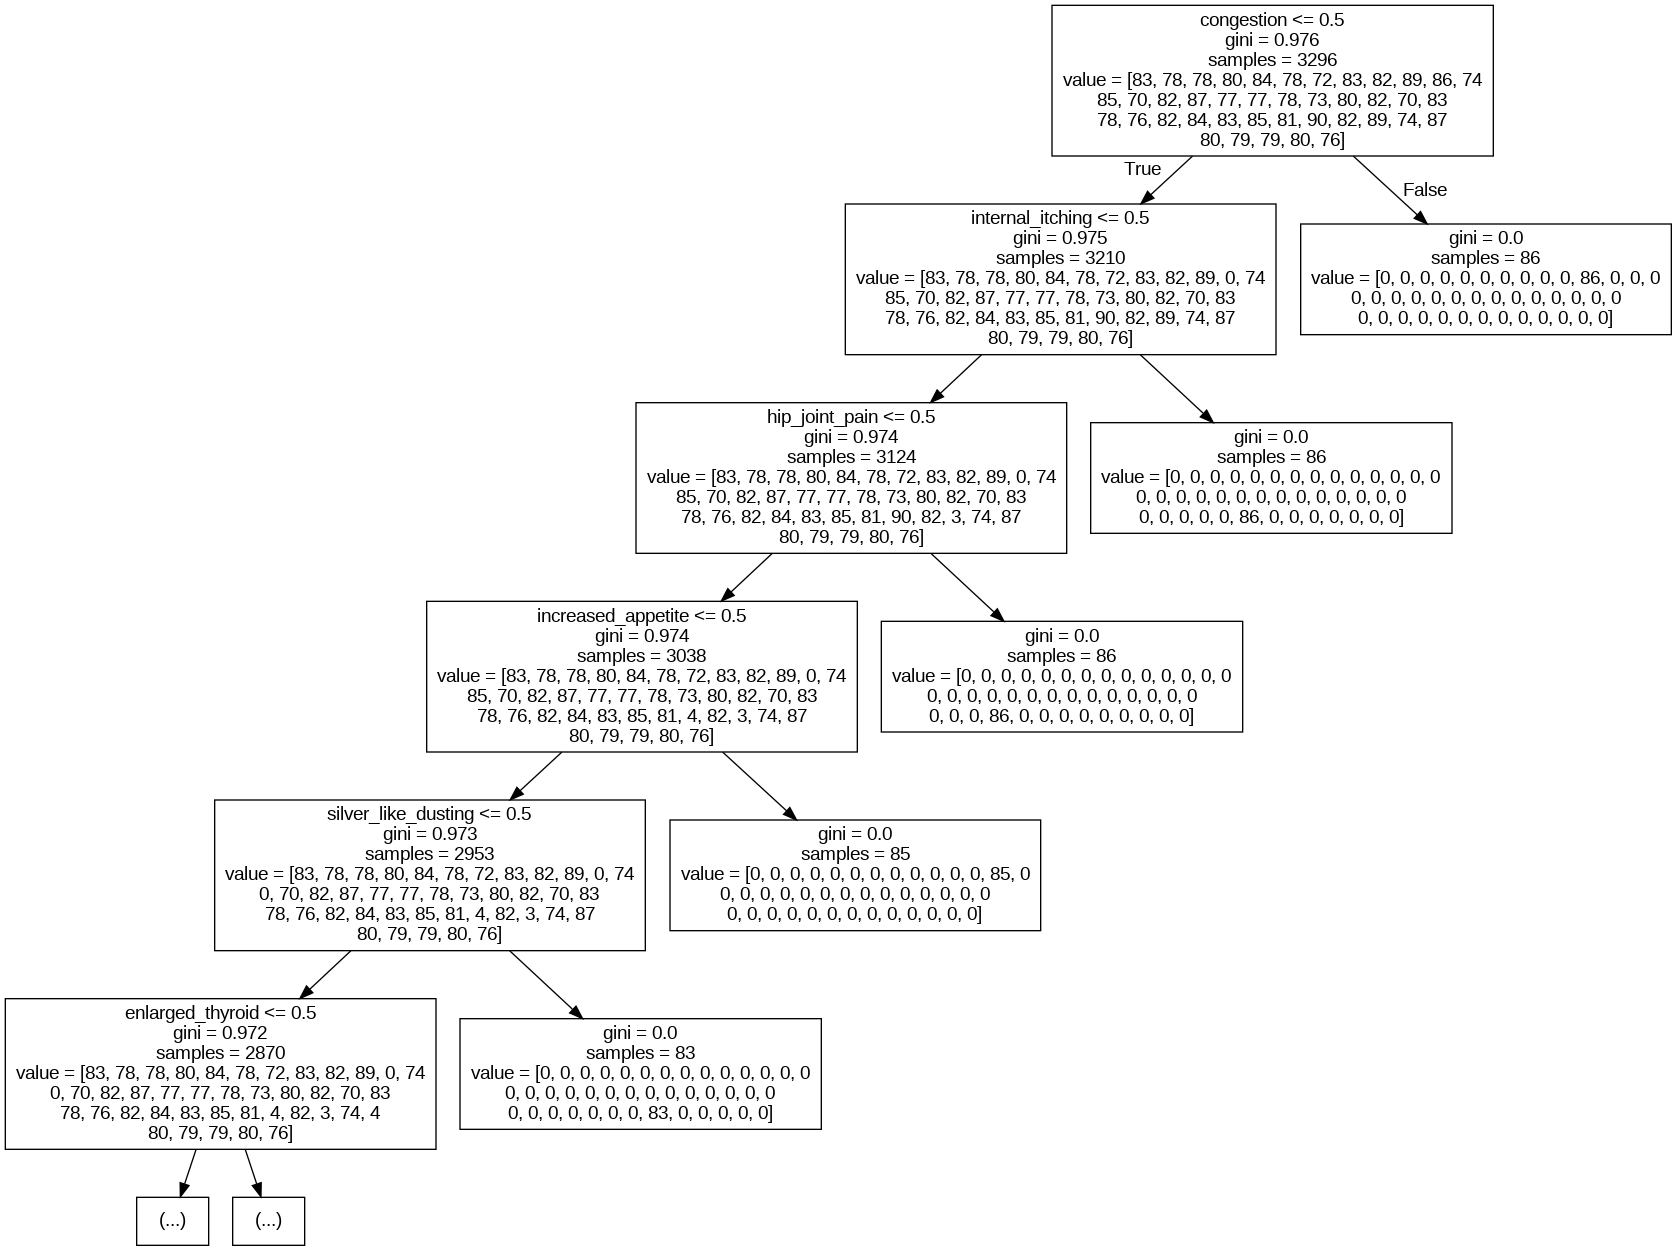

In [408]:
from IPython.display import Image
Image(filename='tree-top5.png')

In [409]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [410]:
feature_dict['internal_itching']

93

In [411]:
sample_x = [i/52 if i==52 else i*0 for i in range(len(features))]
cols = list(data.columns)
print(cols.index('skin_rash'))

1


This means predicting the disease where the only symptom is redness_of_eyes.

In [412]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [413]:
dt.predict(sample_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [414]:
dt.predict_proba(sample_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.        , 0.        , 0.11764706, 0.        ,
        0.11764706, 0.        , 0.11764706, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.17647059, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.17647059, 0.        , 0.        , 0.17647059, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11764706,
        0.        ]])

In [415]:
len(sample_x)

1

In [416]:
symptoms = ['skin_rash','itching','nodal_skin_eruptions','increased_appetite','irritability']
ipt = [0 for i in range(len(features))]
for s in symptoms:
  ipt[cols.index(s)]=1
ipt = np.array([ipt])
print(ipt)
print(dt.predict(ipt))
dt.predict_proba(ipt)

[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['Diabetes ']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

the disease classfication has been completed , to know more about our model we can implement knn and svn models to check our prediction accuracy 

In [417]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

In [418]:
data.head(3)


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  

[3 rows x 133 columns]

In [419]:
data.describe()


itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [420]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


SVM Support Vector Machine model




In [421]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test


In [422]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(x_test)

In [423]:
ml.score(x_test,y_test)


1.0

In [424]:
confusion_matrix(y_test,y_pred)


array([[34,  0,  0, ...,  0,  0,  0],
       [ 0, 38,  0, ...,  0,  0,  0],
       [ 0,  0, 41, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 41,  0,  0],
       [ 0,  0,  0, ...,  0, 31,  0],
       [ 0,  0,  0, ...,  0,  0, 38]])

 Disease Prediction using KNN -The K-Nearest Neighbours Algorithm

In [425]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [426]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

Minimum error:- 0.0 at K = 1


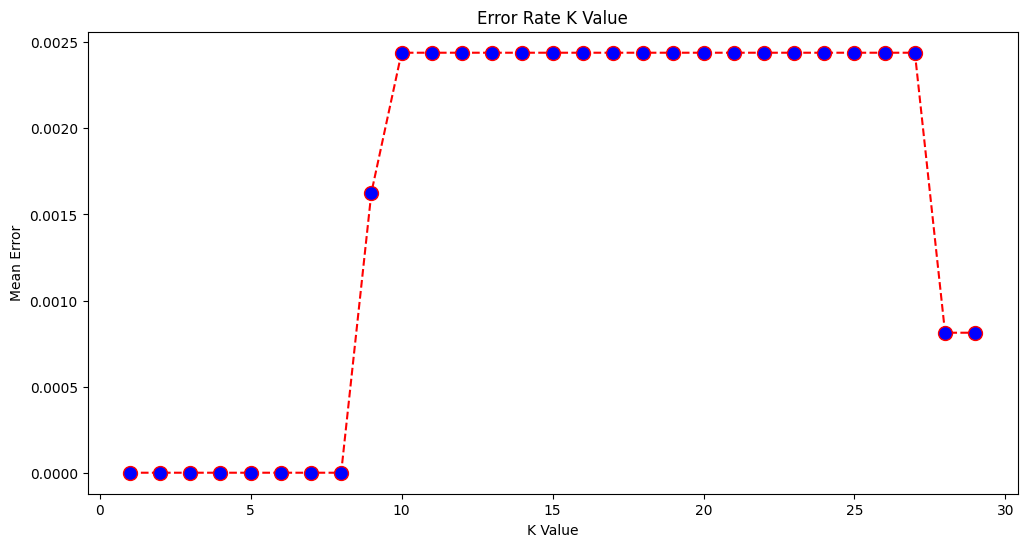

In [427]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [428]:
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)


In [429]:
accuracy_score(y_test, y_pred)


1.0

In [430]:
cm

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0, 27,  0, ...,  0,  0,  0],
       [ 0,  0, 34, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 28,  0,  0],
       [ 0,  0,  0, ...,  0, 34,  0],
       [ 0,  0,  0, ...,  0,  0, 33]])